In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn import datasets

## Preparations

### File reading

In [2]:
if 'plots' in os.getcwd():
    print("cwd is correct")
else:
    MYDIR = ("plots")
    os.chdir("../")
    CHECK_FOLDER = os.path.isdir(MYDIR)
    ## If folder doesn't exist, then create it.
    if not CHECK_FOLDER:
        os.makedirs(MYDIR)
        print("created folder : ", MYDIR)

    else:
        print(MYDIR, "folder already exists.")

os.chdir("plots/")
print("current directroy is: ", os.getcwd())

plots folder already exists.
current directroy is:  /media/hmk/Galeri/Files/Projects/Multi_Agents_Area_Exploration/analysing_data/plots


In [3]:
# check the data for NaN values or other errors
df_all = pd.read_csv(f"../../data_save/data_files/2/all_data.csv")

### Adding an extra column

In [4]:
df_all['method_abbr'] = df_all['method'].apply(lambda x: ''.join([str(i[0]) for i in x.split('_')]))
df_all['method_abbr']

0         FC
1         FC
2         FC
3         FC
4         FC
        ... 
2343    VFHC
2344    VFHC
2345    VFHC
2346    VFHC
2347    VFHC
Name: method_abbr, Length: 2348, dtype: object

### Some small analysis over data

In [5]:
df_all.shape

(2348, 28)

In [6]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2348 entries, 0 to 2347
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2348 non-null   int64  
 1   area_percent    2348 non-null   float64
 2   update_time     2348 non-null   float64
 3   delta_time      2348 non-null   float64
 4   plan_length     2348 non-null   int64  
 5   replan_count    2348 non-null   int64  
 6   logging_time    2348 non-null   float64
 7   frame_count     2348 non-null   int64  
 8   known_area      2348 non-null   int64  
 9   success         2348 non-null   bool   
 10  seed            2348 non-null   int64  
 11  draw_sim        2348 non-null   bool   
 12  log_plots       2348 non-null   bool   
 13  use_threads     2348 non-null   bool   
 14  n_bots          2348 non-null   int64  
 15  grid_thickness  2348 non-null   int64  
 16  screen_width    2348 non-null   int64  
 17  screen_height   2348 non-null   i

In [7]:
df_all.columns

Index(['Unnamed: 0', 'area_percent', 'update_time', 'delta_time',
       'plan_length', 'replan_count', 'logging_time', 'frame_count',
       'known_area', 'success', 'seed', 'draw_sim', 'log_plots', 'use_threads',
       'n_bots', 'grid_thickness', 'screen_width', 'screen_height',
       'min_room_size', 'max_room_size', 'wall_ratio', 'method',
       'start_scenario', 'goal_scenario', 'experiment_ID', 'loss_type',
       'execution_date', 'method_abbr'],
      dtype='object')

In [8]:
# df_all[df_all['method_abbr']=='F.C.']

In [9]:
df_all['experiment_ID'].unique()

array([1, 0, 3, 2, 5, 4, 7, 6])

In [10]:
for i,[method, group] in enumerate(df_all.groupby(['method_abbr', 'goal_scenario'])):
    print("i: ", i, "Method: ", method, "Group: ", group.shape)

i:  0 Method:  ('FC', 'Edge_Start_Goal') Group:  (585, 28)
i:  1 Method:  ('FC', 'Top_Left_Start_Goal') Group:  (760, 28)
i:  2 Method:  ('UR', 'Rand_Start_Goal') Group:  (691, 28)
i:  3 Method:  ('VFHC', 'Distributed_Goal') Group:  (312, 28)


## Average line plot for VFHC method

In [11]:
vfhc_data = df_all[(df_all['method_abbr']=='V.F.H.C.')]
vfhc_data.shape

(0, 28)

In [12]:
# SHOW WHAT IS INSIDE THE DATAFRAME
# vfhc_data

In [13]:
for i,[method, group] in enumerate(vfhc_data.groupby(['method_abbr', 'goal_scenario'])):
    count_group = group.groupby(['frame_count'])
    sns.lineplot(x="frame_count", y="area_percent", data=group, label=method)

In [14]:
pd.options.display.max_rows = 4000

In [15]:
vfhc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      0 non-null      int64  
 1   area_percent    0 non-null      float64
 2   update_time     0 non-null      float64
 3   delta_time      0 non-null      float64
 4   plan_length     0 non-null      int64  
 5   replan_count    0 non-null      int64  
 6   logging_time    0 non-null      float64
 7   frame_count     0 non-null      int64  
 8   known_area      0 non-null      int64  
 9   success         0 non-null      bool   
 10  seed            0 non-null      int64  
 11  draw_sim        0 non-null      bool   
 12  log_plots       0 non-null      bool   
 13  use_threads     0 non-null      bool   
 14  n_bots          0 non-null      int64  
 15  grid_thickness  0 non-null      int64  
 16  screen_width    0 non-null      int64  
 17  screen_height   0 non-null      int64  
 18  mi

In [16]:
unique =  set(vfhc_data.frame_count.unique())
# SHOW UNIQUE VALUES OF THE frame_count COLUMN
unique

set()

In [17]:
for i,[method, group] in enumerate(vfhc_data.groupby(['method_abbr', 'goal_scenario'])):
    count_group = group.groupby(['frame_count'])
    unique =  set(group.frame_count.unique())
    data = group.groupby("experiment_ID").agg({"frame_count":lambda x: unique - set(x)}).explode("frame_count").dropna().reset_index()
    data["area_percent"] = 1
    new_data = pd.concat([group, data]).sort_values(["experiment_ID", "frame_count"])

In [18]:
unique =  set(vfhc_data.frame_count.unique())
data = vfhc_data.groupby("experiment_ID").agg({"frame_count":lambda x: unique - set(x)}).explode("frame_count").dropna().reset_index()
data["area_percent"] = 1
new_data = pd.concat([vfhc_data, data]).sort_values(["experiment_ID", "frame_count"])
# new_data


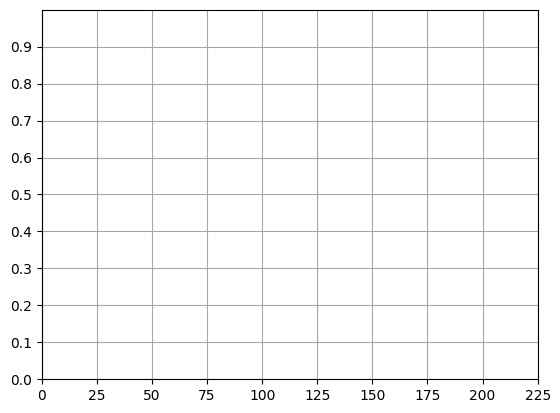

In [19]:
count_group = new_data.groupby(['frame_count'])
sns.lineplot(x="frame_count", y="area_percent", data=new_data, label=method)
plt.xticks(np.arange(0, 250, step=25))
plt.yticks(np.arange(0, 1, step=0.1))
plt.grid(True, which="both", ls="-", color='0.65')

## Average line plotting for all 4 different methods

NameError: name 'root_dir' is not defined

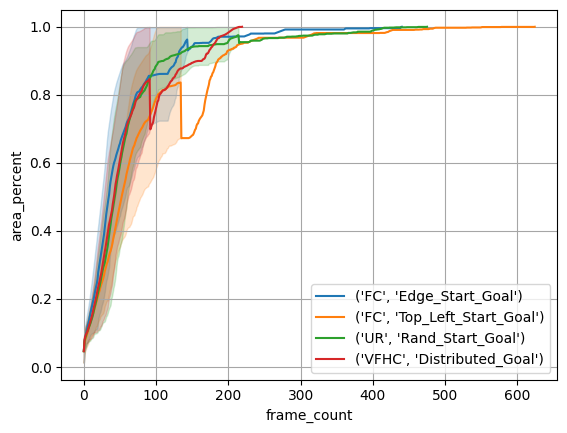

In [20]:
for i,[method, group] in enumerate(df_all.groupby(['method_abbr', 'goal_scenario'])):
    # print("i: ", i, "Method: ", method, "Group: ", group.shape)
    count_group = group.groupby(['frame_count'])
    sns.lineplot(x="frame_count", y="area_percent", data=group, label=method)


# plt.ylim(0.6, 1)
# plt.xlim(80,150)
plt.xlabel('frame_count')
plt.ylabel('area_percent')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# plt.tight_layout()
plt.grid(True, which="both", ls="-", color='0.65')
os.makedirs(f'{root_dir}/plots', exist_ok=True)
plt.savefig(f'{root_dir}/plots/1_frame_count_vs_area_percent_without_fix.png', dpi=300)

NameError: name 'root_dir' is not defined

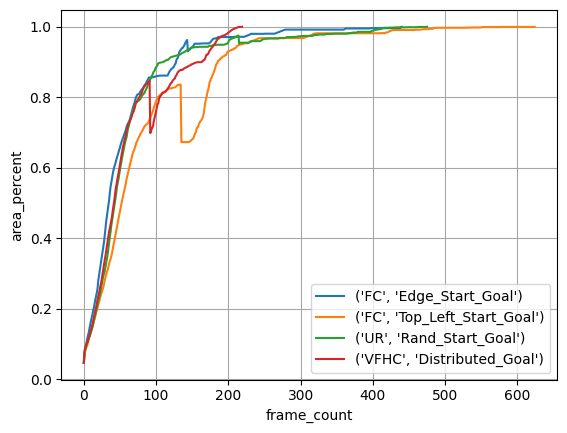

In [21]:
# SHOW ONLY THE MEAN LINES
for i,[method, group] in enumerate(df_all.groupby(['method_abbr', 'goal_scenario'])):
    count_group = group.groupby(['frame_count'])
    x_data = count_group['area_percent'].mean()
    sns.lineplot(x_data, label=method)

plt.xlabel('frame_count')
plt.ylabel('area_percent')
plt.grid(True, which="both", ls="-", color='0.65')
os.makedirs(f'{root_dir}/plots', exist_ok=True)
plt.savefig(f'{root_dir}/plots/1_frame_count_vs_area_percent_mean_without_fix.png', dpi=300)

In [26]:
for i,[method, group] in enumerate(df_all.groupby(['method_abbr', 'goal_scenario'])):
    print("i: ", i, "Method: ", method, "Group: ", group.shape)
    count_group = group.groupby(['frame_count'])
    unique =  set(group.frame_count.unique())
    print(unique)
    
    data2 = group.groupby("experiment_ID").agg({"frame_count":lambda x: unique - set(x)}).explode("frame_count").dropna().reset_index()
    data2["area_percent"] = 1
    data2
    break
#     new_data = pd.concat([group, data2]).sort_values(["experiment_ID", "frame_count"])
    
#     count_group = new_data.groupby(['frame_count'])
#     sns.lineplot(x="frame_count", y="area_percent", data=new_data, label=method)

# os.makedirs(f'{root_dir}/plots', exist_ok=True)
# plt.savefig(f'{root_dir}/plots/2_frame_count_vs_area_percent_after_fix.png', dpi=300)
    

i:  0 Method:  ('FC', 'Edge_Start_Goal') Group:  (585, 28)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 

i:  0 Method:  ('FC', 'Edge_Start_Goal') Group:  (585, 28)
i:  1 Method:  ('FC', 'Top_Left_Start_Goal') Group:  (760, 28)
i:  2 Method:  ('UR', 'Rand_Start_Goal') Group:  (691, 28)
i:  3 Method:  ('VFHC', 'Distributed_Goal') Group:  (312, 28)


NameError: name 'root_dir' is not defined

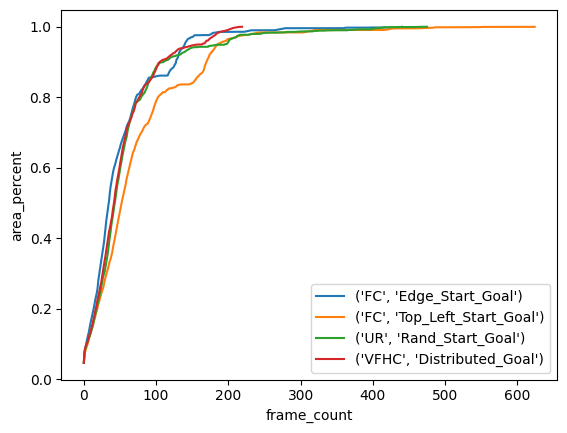

In [23]:
for i,[method, group] in enumerate(df_all.groupby(['method_abbr', 'goal_scenario'])):
    print("i: ", i, "Method: ", method, "Group: ", group.shape)
    count_group = group.groupby(['frame_count'])
    unique =  set(group.frame_count.unique())
    
    data2 = group.groupby("experiment_ID").agg({"frame_count":lambda x: unique - set(x)}).explode("frame_count").dropna().reset_index()
    data2["area_percent"] = 1
    new_data = pd.concat([group, data2]).sort_values(["experiment_ID", "frame_count"])

    count_group = new_data.groupby(['frame_count'])
    x_data = count_group['area_percent'].mean()
    sns.lineplot(x_data, label=method)

os.makedirs(f'{root_dir}/plots', exist_ok=True)
plt.savefig(f'{root_dir}/plots/2_frame_count_vs_area_percent_mean_after_fix.png', dpi=300)
    

## Dense vs sparse data differences

In [ ]:
df_all.columns

In [ ]:
vfhc_data_dense = df_all[(df_all['method_abbr']=='V.F.H.C.') & (df_all['min_room_size']==30)]
vfhc_data_dense.shape

In [ ]:
vfhc_data_sparse = df_all[(df_all['method_abbr']=='V.F.H.C.') & (df_all['min_room_size']==300)]
vfhc_data_sparse.shape

In [ ]:
for i,[method, group] in enumerate(vfhc_data_dense.groupby(['method_abbr', 'goal_scenario'])):
    count_group = group.groupby(['frame_count'])
    sns.lineplot(x="frame_count", y="area_percent", data=group, label=method)

In [ ]:
for i,[method, group] in enumerate(vfhc_data_sparse.groupby(['method_abbr', 'goal_scenario'])):
    count_group = group.groupby(['frame_count'])
    sns.lineplot(x="frame_count", y="area_percent", data=group, label=method)

In [ ]:
df_all_dense = df_all[(df_all['min_room_size']==30)]
df_all_dense.shape

In [ ]:
df_all_sparse = df_all[(df_all['min_room_size']==300)]
df_all_sparse.shape

In [ ]:
for i,[method, group] in enumerate(df_all_dense.groupby(['method_abbr', 'goal_scenario'])):
    print("i: ", i, "Method: ", method, "Group: ", group.shape)
    count_group = group.groupby(['frame_count'])
    unique =  set(group.frame_count.unique())
    
    data2 = group.groupby("experiment_ID").agg({"frame_count":lambda x: unique - set(x)}).explode("frame_count").dropna().reset_index()
    data2["area_percent"] = 1
    new_data = pd.concat([group, data2]).sort_values(["experiment_ID", "frame_count"])

    count_group = new_data.groupby(['frame_count'])
    x_data = count_group['area_percent'].mean()
    sns.lineplot(x_data, label=method)

os.makedirs(f'{root_dir}/plots', exist_ok=True)
plt.savefig(f'{root_dir}/plots/3_frame_count_vs_area_percent_mean_after_fix_dense.png', dpi=300)

In [ ]:
for i,[method, group] in enumerate(df_all_sparse.groupby(['method_abbr', 'goal_scenario'])):
    print("i: ", i, "Method: ", method, "Group: ", group.shape)
    count_group = group.groupby(['frame_count'])
    unique =  set(group.frame_count.unique())
    
    data2 = group.groupby("experiment_ID").agg({"frame_count":lambda x: unique - set(x)}).explode("frame_count").dropna().reset_index()
    data2["area_percent"] = 1
    new_data = pd.concat([group, data2]).sort_values(["experiment_ID", "frame_count"])

    count_group = new_data.groupby(['frame_count'])
    x_data = count_group['area_percent'].mean()
    sns.lineplot(x_data, label=method)

os.makedirs(f'{root_dir}/plots', exist_ok=True)
plt.savefig(f'{root_dir}/plots/3_frame_count_vs_area_percent_mean_after_fix_sparse.png', dpi=300)

## KDE Plots

In [ ]:
res1 = sns.kdeplot(df_all_dense, x="frame_count", color='green', shade=True)
res2 = sns.kdeplot(df_all_sparse, x="frame_count", color='blue', shade=True)
plt.show()

## Worst scenarios: frame_count & delta_time

In [ ]:
# the worst frame count for each method&goal_scenario
df_all.groupby(['method_abbr', 'goal_scenario'])['frame_count'].max().sort_values()

In [ ]:
# the worst condition of delta time
df_all.groupby(['method_abbr', 'goal_scenario'])['delta_time'].max().sort_values()

## Frame count vs Delta time

In [ ]:
for i,[method, group] in enumerate(df_all.groupby(['method_abbr', 'goal_scenario'])):
    # print("i: ", i, "Method: ", method, "Group: ", group.shape)
    count_group = group.groupby(['frame_count'])
    plt.grid(True, which="both", ls="-", color='0.65')
    sns.lineplot(x="frame_count", y="delta_time", data=group, label=method)
os.makedirs(f'{root_dir}/plots', exist_ok=True)
plt.savefig(f"{root_dir}/plots/frame_count_vs_delta_time.png", dpi=300)

## Pandas drop unnecessary columns

In [ ]:
# DROP CERTAIN COLUMNS FROM THE DATAFRAME
# to_drop = ['update_time', 'delta_time',
#        'plan_length', 'replan_count', 'logging_time',
#        'known_area', 'success', 'seed', 'draw_sim', 'log_plots', 'use_threads',
#        'n_bots', 'grid_thickness', 'screen_width', 'screen_height',
#        'min_room_size', 'max_room_size', 'wall_ratio', 'method',
#        'start_scenario', 'experiment_ID', 'loss_type',
#        'execution_date']
# vfhc_data.drop(to_drop, inplace=True, axis=1)

## Pandas data separation

In [ ]:
# dense_room = df_all[(df_all['n_bots']==4) & (df_all['min_room_size']==30)]
# dense_room.head()

In [ ]:
# empty_room = df_all[(df_all['n_bots']==4) & (df_all['min_room_size']==300)]
# empty_room.head()

In [ ]:
# dense_room.shape

In [ ]:
# empty_room.shape

In [ ]:
# sns.lineplot(x="Frame Count", y='Area Percent', hue="Method", data=dense_room)
# # plt.ylim(0.6, 1)
# # plt.xlim(0,200)
# os.makedirs(f"{root_dir}/data_analysis/plotting", exist_ok=True)
# plt.savefig(f"{root_dir}/data_analysis/plotting/area_percent_vs_frame_count_hue_method.png", dpi=300)


In [ ]:
# sns.lineplot(x="Frame Count", y='Area Percent', hue="Method", data=empty_room)
# # plt.ylim(0.6, 1)
# # plt.xlim(0,200)
# os.makedirs(f"{root_dir}/data_analysis/plotting", exist_ok=True)
# plt.savefig(f"{root_dir}/data_analysis/plotting/area_percent_vs_frame_count_hue_method.png", dpi=300)
